In [4]:
########################################################################################################
# WorkFlow based on machine learning mastery (https://machinelearningmastery.com/) by Jason BrownLee.
# Excellent Tutorial here https://towardsdatascience.com/building-a-simple-machine-learning-model
# -on-breast-cancer-data-eca4b3b99fa3 
# Modified for  medical device applications considering regulatory process by Geoff Spence
########################################################################################################

# Guidelines 
# Training and validation on data must be clinically meaningful
# Independent blinded evaluation on validaion data
# Applications must generalise to wider population
# Consistent means of measuring performance of algorithms

# Machine Learning workflow

# Step 1. Define Problem: Investigate and characterize the problem in order to better understand
#the goals of the project.
# a) how many patients do we have ? - sample size
# b) how many classes do we have ?  - Benign or malignant 
# c) how many features do we have ? 
# d) do we have a class imbalance ? - prevalence of the disease 
# e) Training / Validation Spilt (Training and testing on data that is clinically meaningful)
# f) measure of performance - accuracy ? ROC (auc) 
# g) final outcome - specificity reported against a 98% sensitivity level  
# h) FDA standards 10-15 samples required per feature used

# Step 2. Analyze Data: Use descriptive statistics and visualization to better understand the data
#you have available.
# check correlation of features 
# check skewness of features 
# check for outliers 
# check for missing values 
# check features for mean, median, percentiles 
# visualise distribution of the features
# visualise distribution of the features (by class)
# visualise outliers (box plot)
# visualise correlation 
# visualise pairwise scatterplot

# Step 3. Prepare Data: Use data transforms in order to better expose the structure of the
#prediction problem to modeling algorithms.

# Train Validation Spilt 
# on training data only 
# standardisation
# select important features (dimensionality reduction) 
# transform features to a Gaussian distribution?
# remove correlated features 

# Step 4. Evaluate Algorithms: Design a test harness to evaluate a number of standard algorithms
# on the data and select the top few to investigate further.
# on training data only 
# LR, LDA, CART, NB, SVM, MLP
# metric ROC (auc) 
# k fold - cross-validation 
# Confidence intervals 

# Step 5. Improve Results: Use most promising methods from stage 4.  Use algorithm tuning, hyperparameter selection and ensemble methods to get the most out of
# well-performing algorithms on your data.
# on training data only 
# create a pipeline (standardisation, PCA - dimensionality reduction)
# hyper-parameter selection (PCA  - which components should we use and logisitic regression (regularisation parameter))
# logistic regression (class imbalance)

# Step 6. Present Results: Finalize the model, make predictions and present results. 
# finialise model on all training data

# create a pipeline (standardisation, PCA - dimensionality reduction) using parameters learnt from training 
# apply pipeline X to training  data
# fit model to training data (using selected hyperparameters from step 5)

# get predictions on Validation data 
# apply pipeline X to validation data
# make predictions on Validation data - report ROC (auc), sensitivity and specificity against a threshold


In [2]:
#change directory
import os
default_path = '.'
os.chdir(default_path)

In [3]:
#importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import set_option
from sklearn.linear_model import LogisticRegression 
from sklearn.decomposition import PCA 
from sklearn.feature_selection import SelectKBest 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline,make_pipeline
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,SCORERS
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis,QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from mpl_toolkits.mplot3d import Axes3D

In [4]:
#importing our cancer dataset (use pandas)
dataset = pd.read_csv('data.csv')

# The dataset used in this story is publicly available and was created by Dr. William H. Wolberg, 
# physician at the University Of Wisconsin Hospital at Madison, Wisconsin, USA. 

#Attribute Information:
#ID number 2) Diagnosis (M = malignant, B = benign) 3–32)
#Ten real-valued features are computed for each cell nucleus:
#radius (mean of distances from center to points on the perimeter)
#texture (standard deviation of gray-scale values)
#perimeter
#area
#smoothness (local variation in radius lengths)
#compactness (perimeter² / area — 1.0)
#concavity (severity of concave portions of the contour)
#concave points (number of concave portions of the contour)
#symmetry
#fractal dimension (“coastline approximation” — 1)

#The mean, standard error and “worst” or largest (mean of the three largest values) of these features were
#computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, 
#field 23 is Worst Radius.)


In [5]:
# Step 1. Define Problem:
# list the features 
names = list(dataset.columns.values)
Bnames = (names[1:31])
print(names)

['id', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst', 'diagnosis']


In [6]:
# Step 1. Define Problem:
#check data dimensions and class distribution
print('the dimensions are')
print(dataset.shape)

the dimensions are
(569, 32)


In [7]:
class_counts = dataset.groupby('diagnosis').size() 
print(class_counts)

diagnosis
B    357
M    212
dtype: int64


In [8]:
# Step 1. Define Problem:
#check the data types 
print('the data types are')
types = dataset.dtypes
print(types)

the data types are
id                           int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst            float64
c

In [9]:
# Step 1. Define Problem:
# print the first and last values  
print(dataset.head(5))
print(dataset.tail(2))

         id  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302        17.99         10.38          122.80     1001.0   
1    842517        20.57         17.77          132.90     1326.0   
2  84300903        19.69         21.25          130.00     1203.0   
3  84348301        11.42         20.38           77.58      386.1   
4  84358402        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  texture_worst  perimeter_worst  area_worst  \
0         0.2419  ...          17.33           184.60

In [10]:
# Step 2. Analyze Data: descriptive statistics
#check data stats summary
print(print(dataset.describe()))

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

In [24]:
# Step 2. Analyze Data: descriptive statistics
#check skewness
print(dataset.skew())

print("\033[1m" + "skew=0 is perfectly symmetrical.") # the \033[1m makes it bold font.
print("skew<-1 or >1 is highly skewed.")

id                         6.47
radius_mean                0.94
texture_mean               0.65
perimeter_mean             0.99
area_mean                  1.65
smoothness_mean            0.46
compactness_mean           1.19
concavity_mean             1.40
concave points_mean        1.17
symmetry_mean              0.73
fractal_dimension_mean     1.30
radius_se                  3.09
texture_se                 1.65
perimeter_se               3.44
area_se                    5.45
smoothness_se              2.31
compactness_se             1.90
concavity_se               5.11
concave points_se          1.44
symmetry_se                2.20
fractal_dimension_se       3.92
radius_worst               1.10
texture_worst              0.50
perimeter_worst            1.13
area_worst                 1.86
smoothness_worst           0.42
compactness_worst          1.47
concavity_worst            1.15
concave points_worst       0.49
symmetry_worst             1.43
fractal_dimension_worst    1.66
dtype: f

In [25]:
# Step 2. Analyze Data: descriptive statistics
# check for missing / null points
dataset.isnull().sum()
#dataset.isna().sum()

id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
diagnosis                  0
dtype: int64

In [26]:
# Step 2. Analyze Data: descriptive statistics
#check correlations
set_option('display.width', 100) 
set_option('precision', 2) 
correlations = dataset.corr(method='pearson') 
print(correlations)

                               id  radius_mean  texture_mean  perimeter_mean  area_mean  \
id                       1.00e+00     7.46e-02      9.98e-02        7.32e-02   9.69e-02   
radius_mean              7.46e-02     1.00e+00      3.24e-01        9.98e-01   9.87e-01   
texture_mean             9.98e-02     3.24e-01      1.00e+00        3.30e-01   3.21e-01   
perimeter_mean           7.32e-02     9.98e-01      3.30e-01        1.00e+00   9.87e-01   
area_mean                9.69e-02     9.87e-01      3.21e-01        9.87e-01   1.00e+00   
smoothness_mean         -1.30e-02     1.71e-01     -2.34e-02        2.07e-01   1.77e-01   
compactness_mean         9.57e-05     5.06e-01      2.37e-01        5.57e-01   4.99e-01   
concavity_mean           5.01e-02     6.77e-01      3.02e-01        7.16e-01   6.86e-01   
concave points_mean      4.42e-02     8.23e-01      2.93e-01        8.51e-01   8.23e-01   
symmetry_mean           -2.21e-02     1.48e-01      7.14e-02        1.83e-01   1.51e-01   

<Figure size 360x360 with 0 Axes>

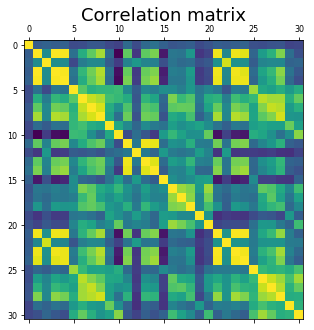

In [28]:
# Step 2. Analyze Data: May be better to view Correlation matrix 
import matplotlib.pyplot as plt
plt.figure()
plt.rcParams.update({'font.size': 8})
plt.matshow(dataset.corr())
plt.rcParams.update({'font.size': 15})
plt.title('Correlation matrix')
plt.show()

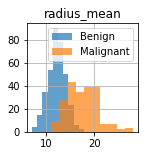

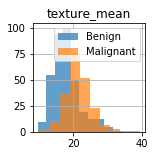

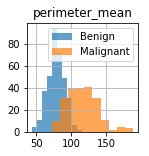

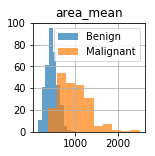

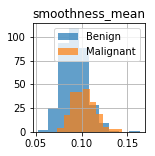

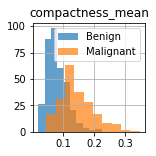

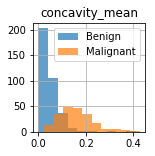

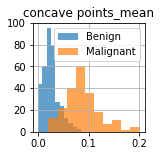

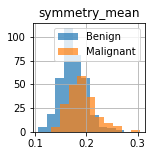

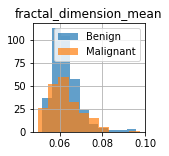

In [49]:
# Step 2. Analyze Data: visualization
# plot class distrubtion for each feature 
plt.rcParams["figure.figsize"] = (2,2)

for i in range(10):
  plt.figure()
  plt.title(Bnames[i])
  dataset.groupby(('diagnosis'))[Bnames[i]].hist(alpha=0.7)
  plt.rcParams.update({'font.size':10})
  plt.gca().legend(('Benign','Malignant')) # I checked with np.where(dataset.diagnosis=='M')[0] for this labelling, below.

plt.show()


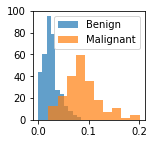

In [48]:
beni = np.where(dataset.diagnosis=='B')[0]
plt.hist(dataset['concave points_mean'][beni],alpha=0.7)

malig = np.where(dataset.diagnosis=='M')[0]
plt.hist(dataset['concave points_mean'][malig],alpha=0.7)

plt.gca().legend(('Benign','Malignant'))
plt.show()

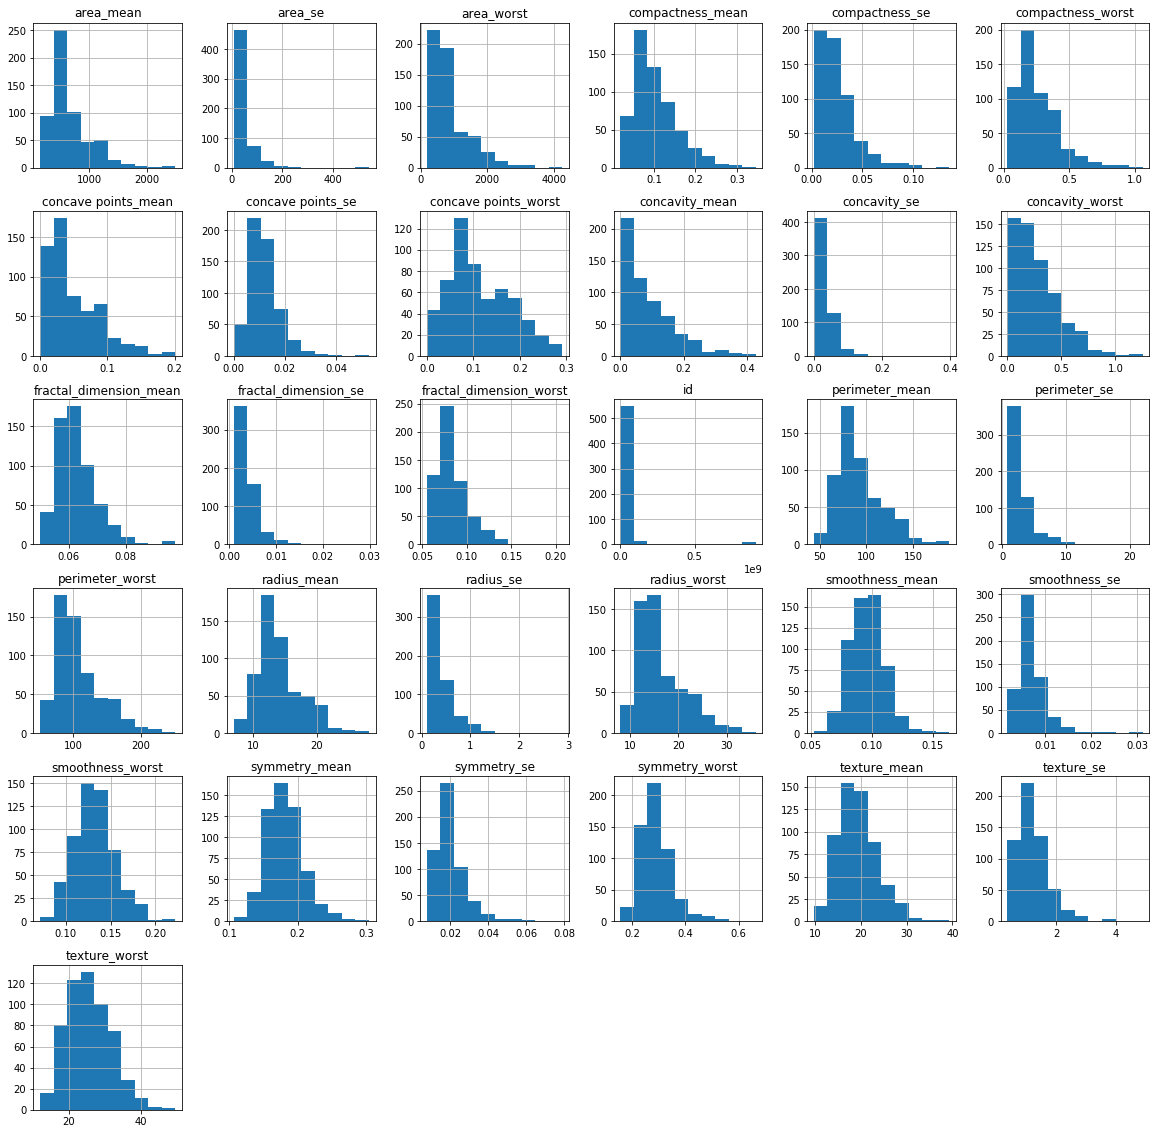

In [51]:
# Step 2. Analyze Data: visualization
dataset.hist()
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

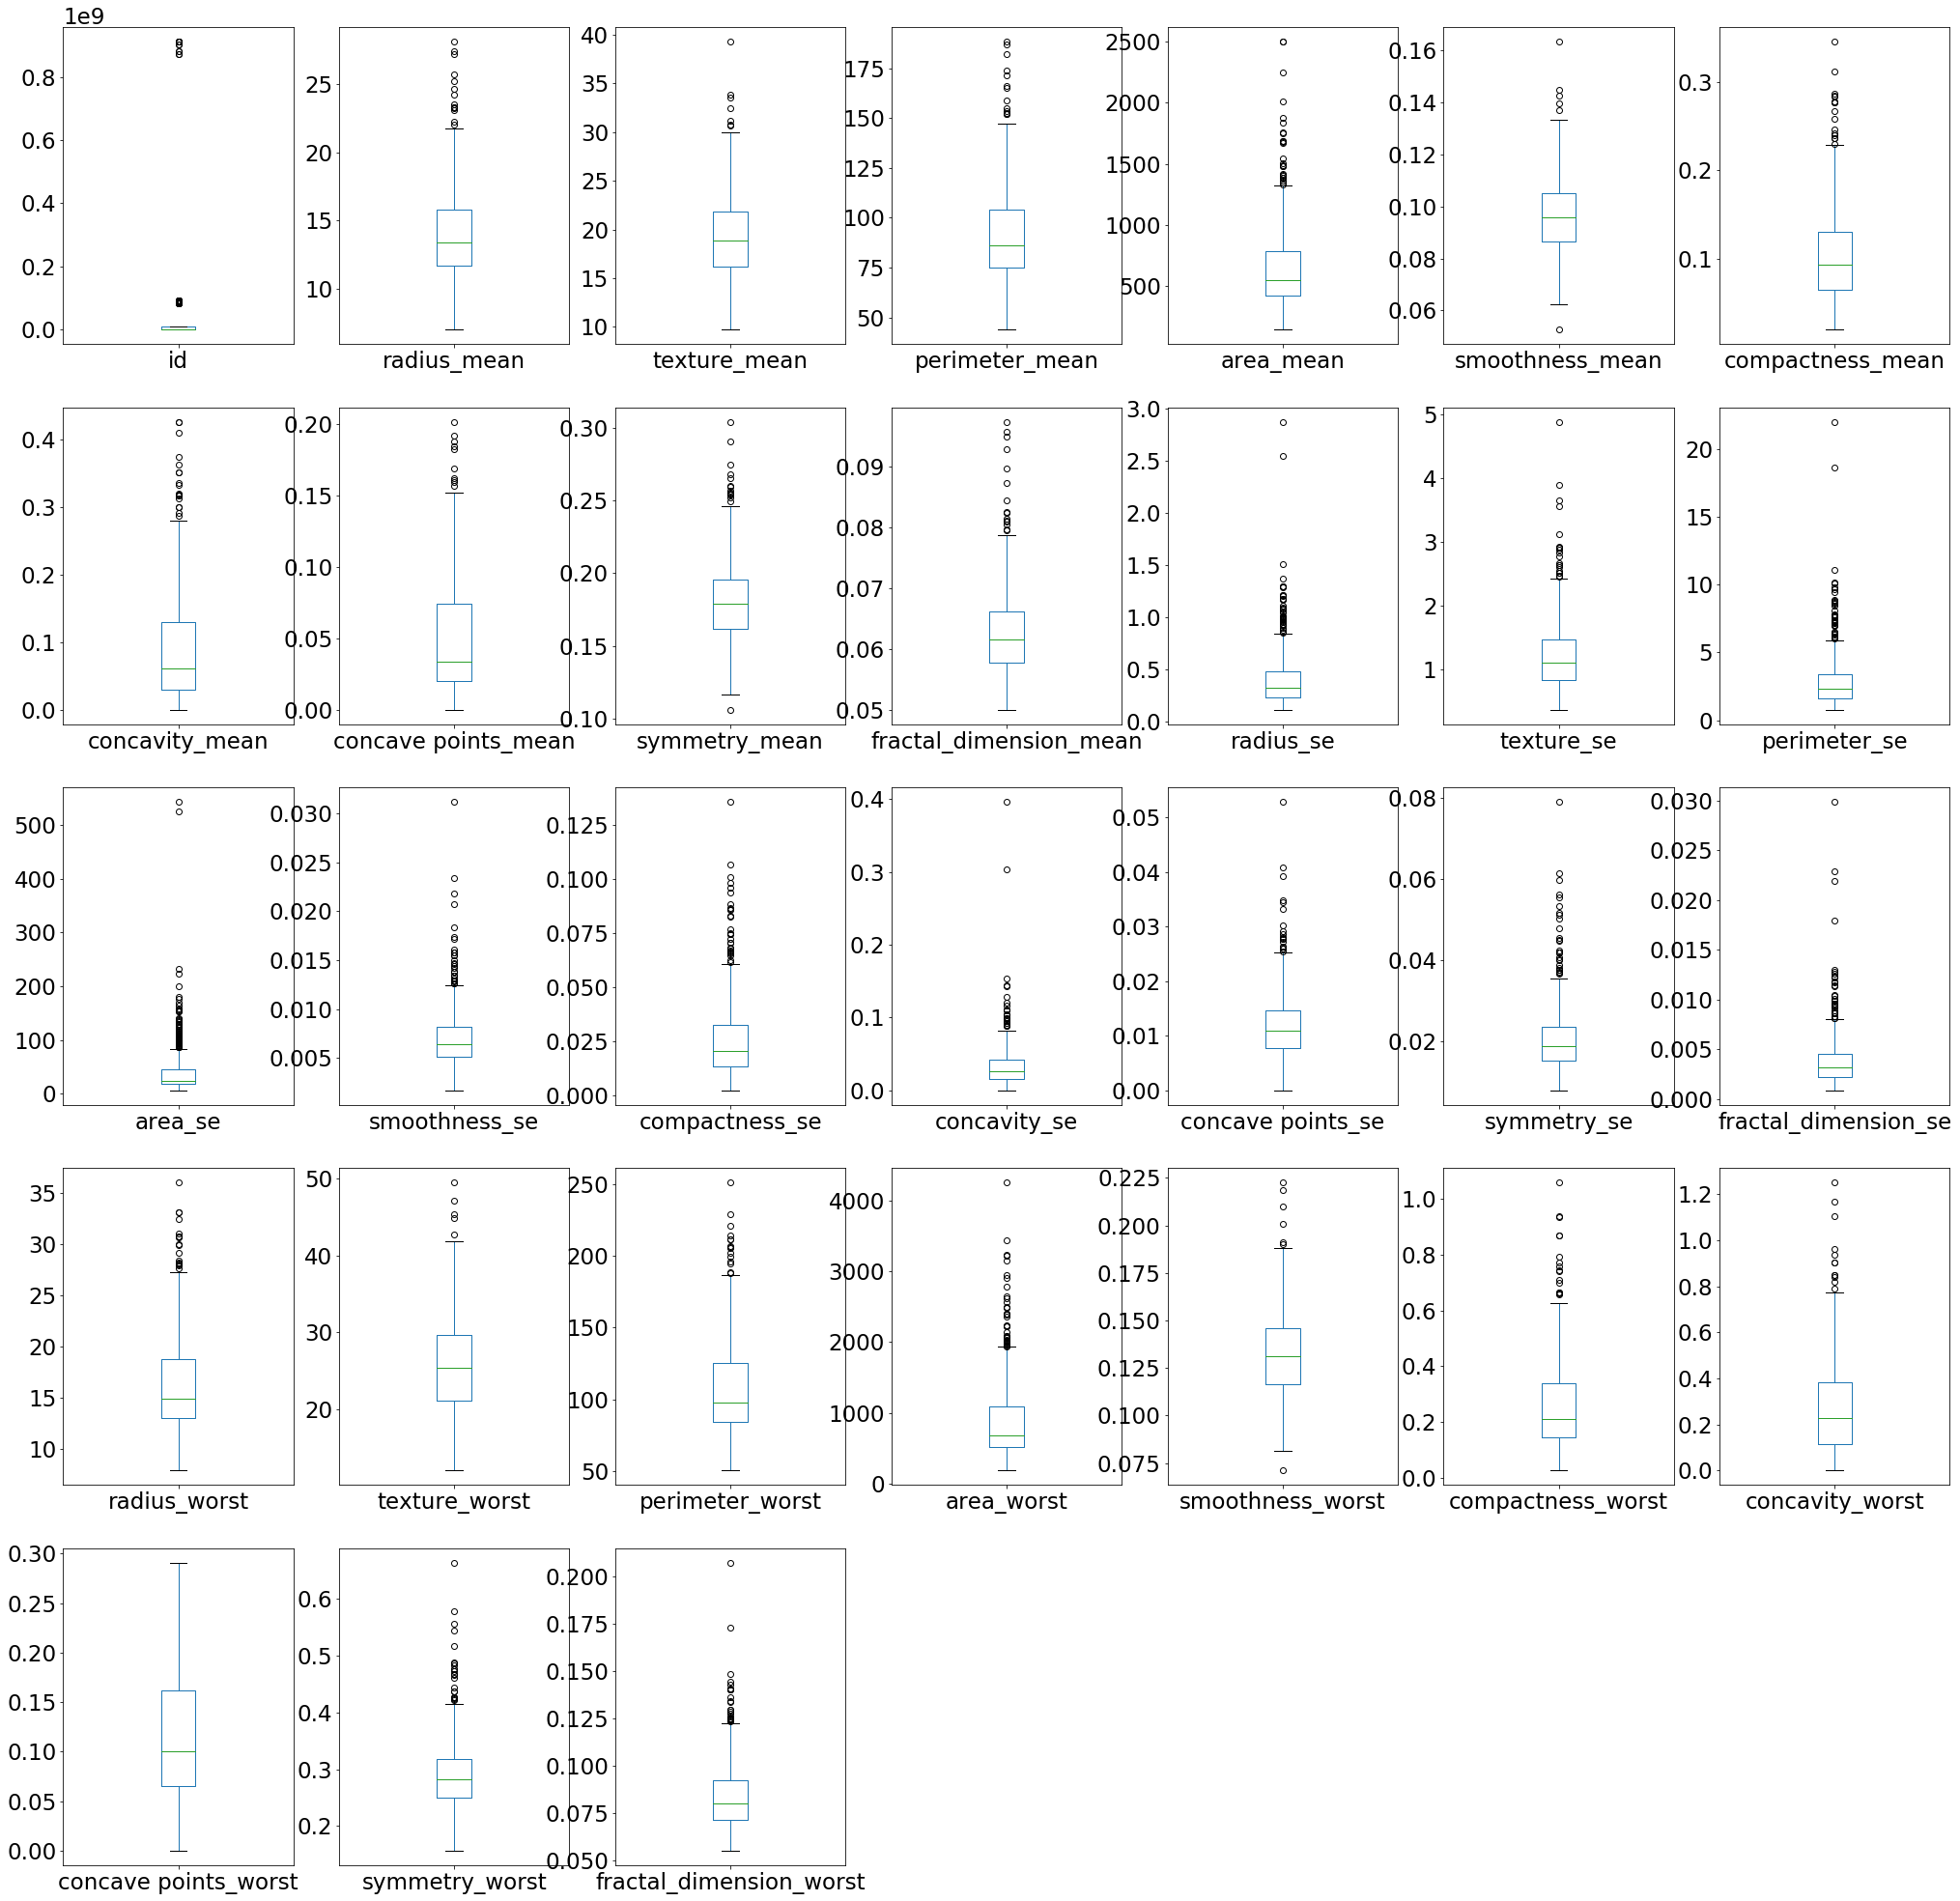

In [56]:
# Step 2. Analyze Data: visualization
plt.rcParams.update({'font.size': 23})
dataset.plot(kind='box', subplots=True, layout=(5,7), sharex=False, sharey=False) 
plt.rcParams["figure.figsize"] = (35,35)
plt.show()

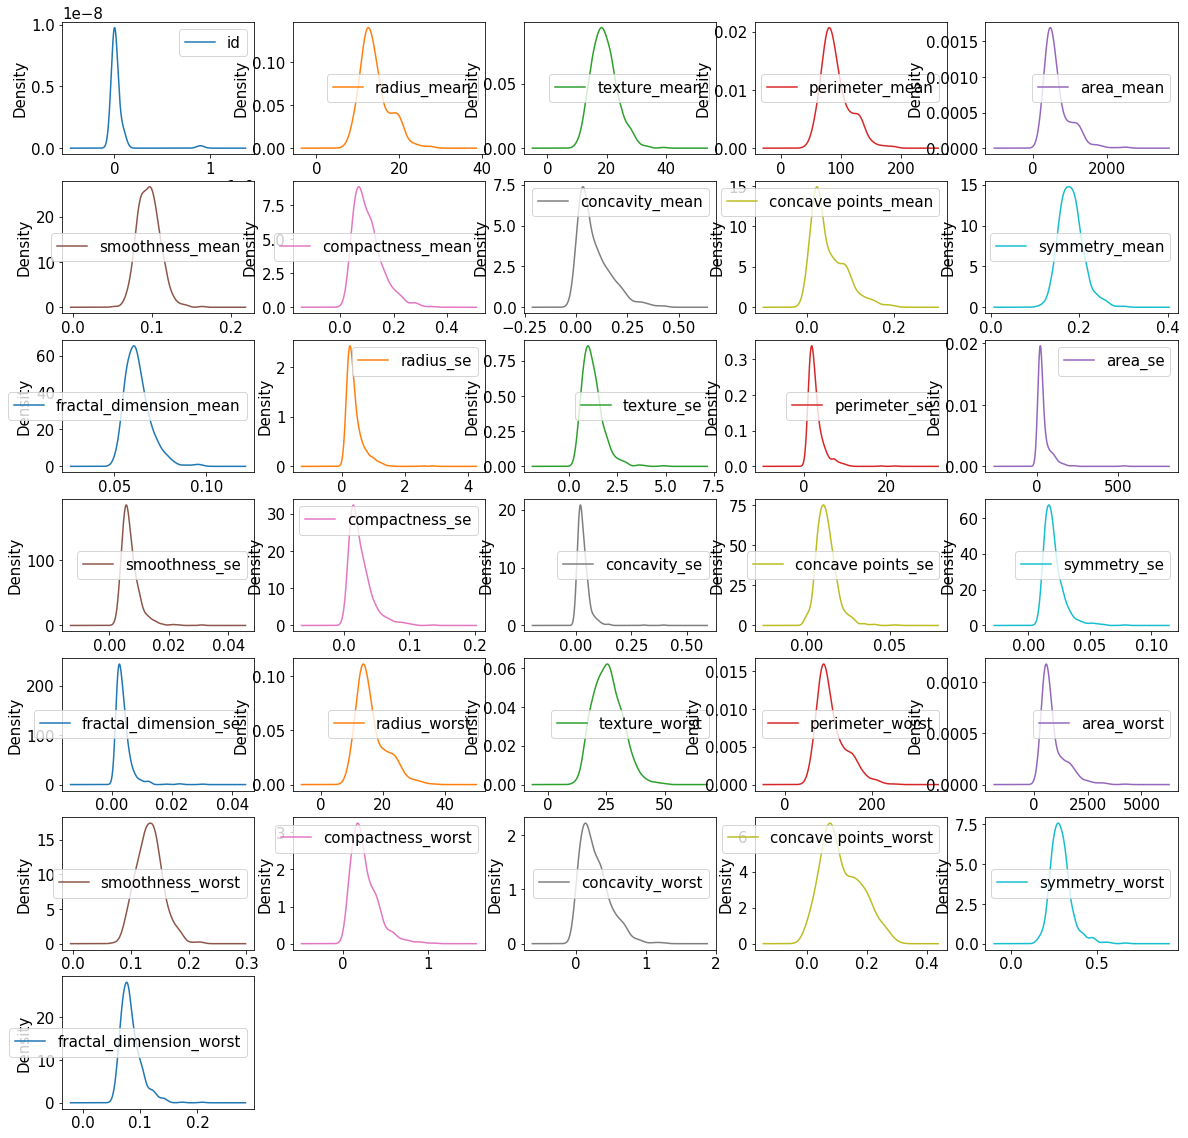

In [67]:
# Step 2. Analyze Data: visualization
plt.rcParams.update({'font.size': 15})
dataset.plot(kind='density', subplots=True, layout=(7,5), sharex=False) 
plt.rcParams["figure.figsize"] = (20,20)
plt.show()

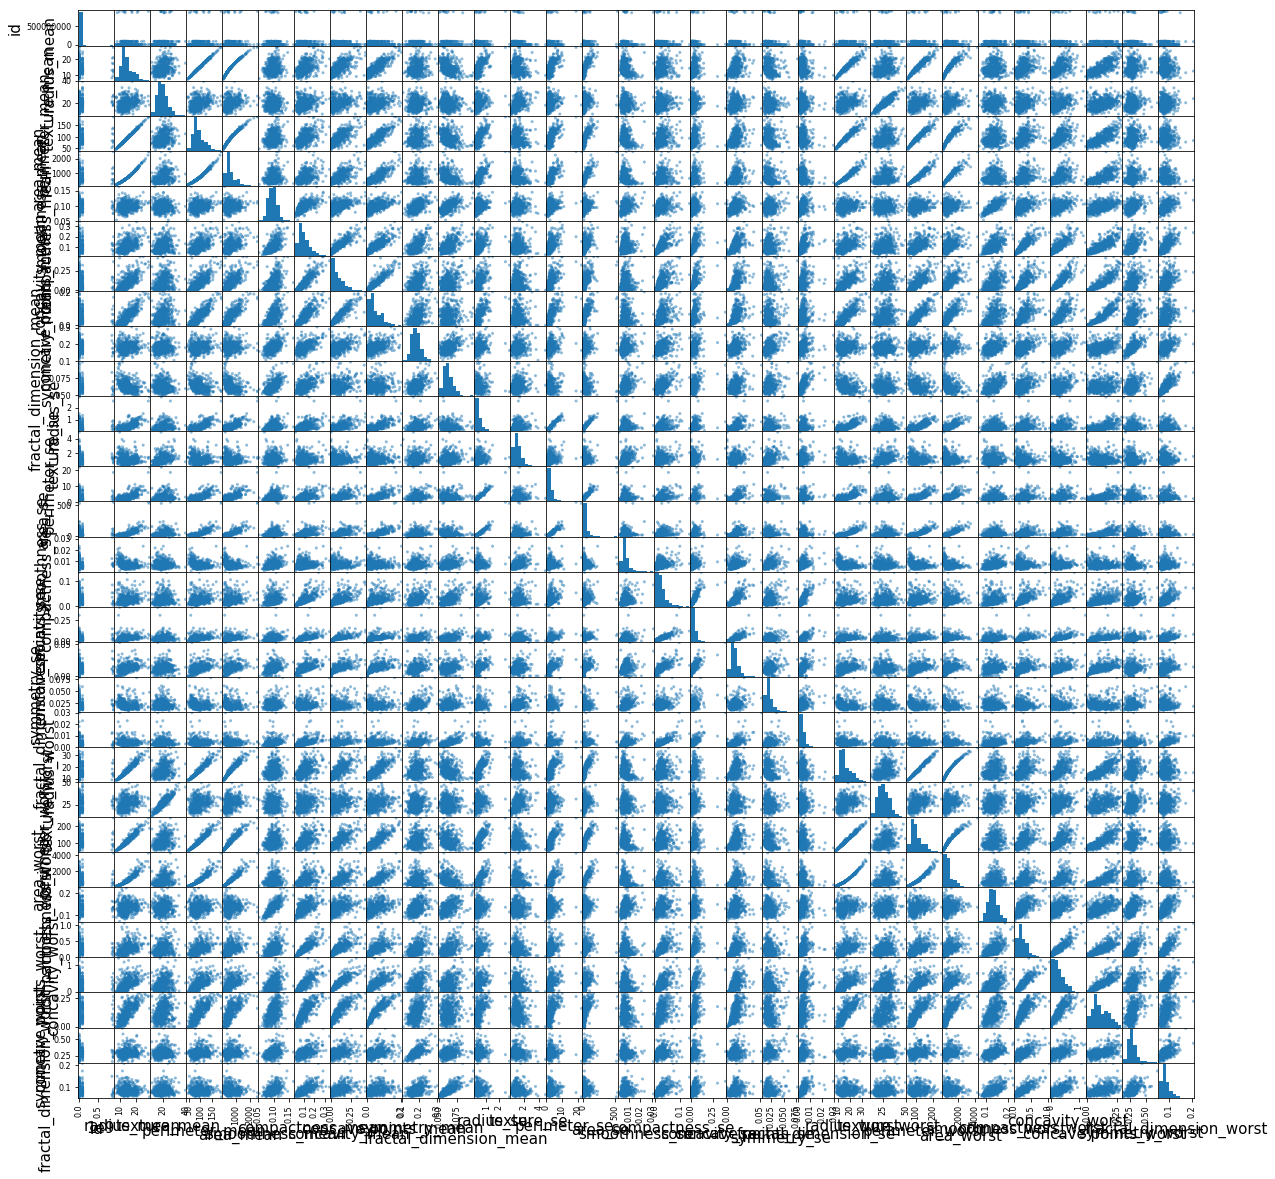

In [68]:
# Step 2. Analyze Data: visualization
scatter = 'on'
if scatter == 'on':
    from pandas.plotting import scatter_matrix  
    plt.rcParams["figure.figsize"] = (20,20)
    scatter_matrix(dataset) 
    plt.show()

In [69]:
#Step 3. Prepare Data: 
X = dataset.iloc[:, 1:31].values    #Predictors / Features 
Y = dataset.iloc[:, 31].values      #Labels

print(X.shape)
print(Y.shape)

(569, 30)
(569,)


In [70]:
#Step 3. #importing our cancer dataset and addressing missing values (use pandas)
dataset1 = pd.read_csv('dataMissingValues.csv') # A slightly different dataset.
print(dataset1.head(1))

# check for missing / null points
dataset1.isnull().sum()



       id  radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0  842302        17.99         10.38           122.8     1001.0             0.12   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  ...  texture_worst  \
0              0.28             0.3                 0.15           0.24  ...          17.33   

   perimeter_worst  area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0            184.6      2019.0              0.16               0.67             0.71   

   concave points_worst  symmetry_worst  fractal_dimension_worst  diagnosis  
0                  0.27            0.46                      NaN          M  

[1 rows x 32 columns]


id                         0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    1
diagnosis                  0
dtype: int64

In [71]:
#Step 3. Prepare Data: 
from sklearn.impute import SimpleImputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(dataset.iloc[:, 1:31].values)
X1 = imp.transform(dataset.iloc[:, 1:31].values) 
# print(X1[0,:])
pd.DataFrame(X1).isnull().sum()


0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    0
27    0
28    0
29    0
dtype: int64

In [72]:
#Step 3. Prepare Data: 
#Encoding categorical data values
#print(Y[0:20])
why = np.array(dataset.iloc[15:30,31]).reshape(1,-1)
print(why)
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
Y = labelencoder_Y.fit_transform(Y)
print("Can use LabelEncoder, but you can't control which is 0 which is 1.")

[['M' 'M' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M']]


In [96]:
print(np.array(Y[15:30]).T)
print("So let's use the results of np.where() from above, so we can be sure we get our labels and confusion matrix right.")

[[1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]]
So let's use the results of np.where() from above, so we can be sure we get our labels and confusion matrix right.


In [94]:
Y = np.empty(shape=(np.shape(dataset)[0],1))  #data['values'].map(dow) np.size(dataset)[0]
Y[beni] = 0
Y[malig] = 1
print(Y[15:30].T)

[[1. 1. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.]]


In [98]:
#Step 3. Prepare Data: 
#train / validation spilt
from sklearn.model_selection import train_test_split
validation_size = 0.4
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size = validation_size, random_state = 0, stratify=Y)


In [99]:
print(X_train.shape)

(341, 30)


In [100]:
print(Y_train.shape)

(341, 1)


In [101]:
print(X_validation.shape)

(228, 30)


In [102]:
print(Y_validation.shape)

(228, 1)


 ## Feature selection with extra trees
  This class implements a meta estimator that fits a number of
  randomized decision trees (a.k.a. extra-trees) on various sub-samples
  of the dataset and uses averaging to improve the predictive accuracy
  and control over-fitting.

C:\Users\Vincent.Hall\AppData\Local\Continuum\anaconda3\envs\ads\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


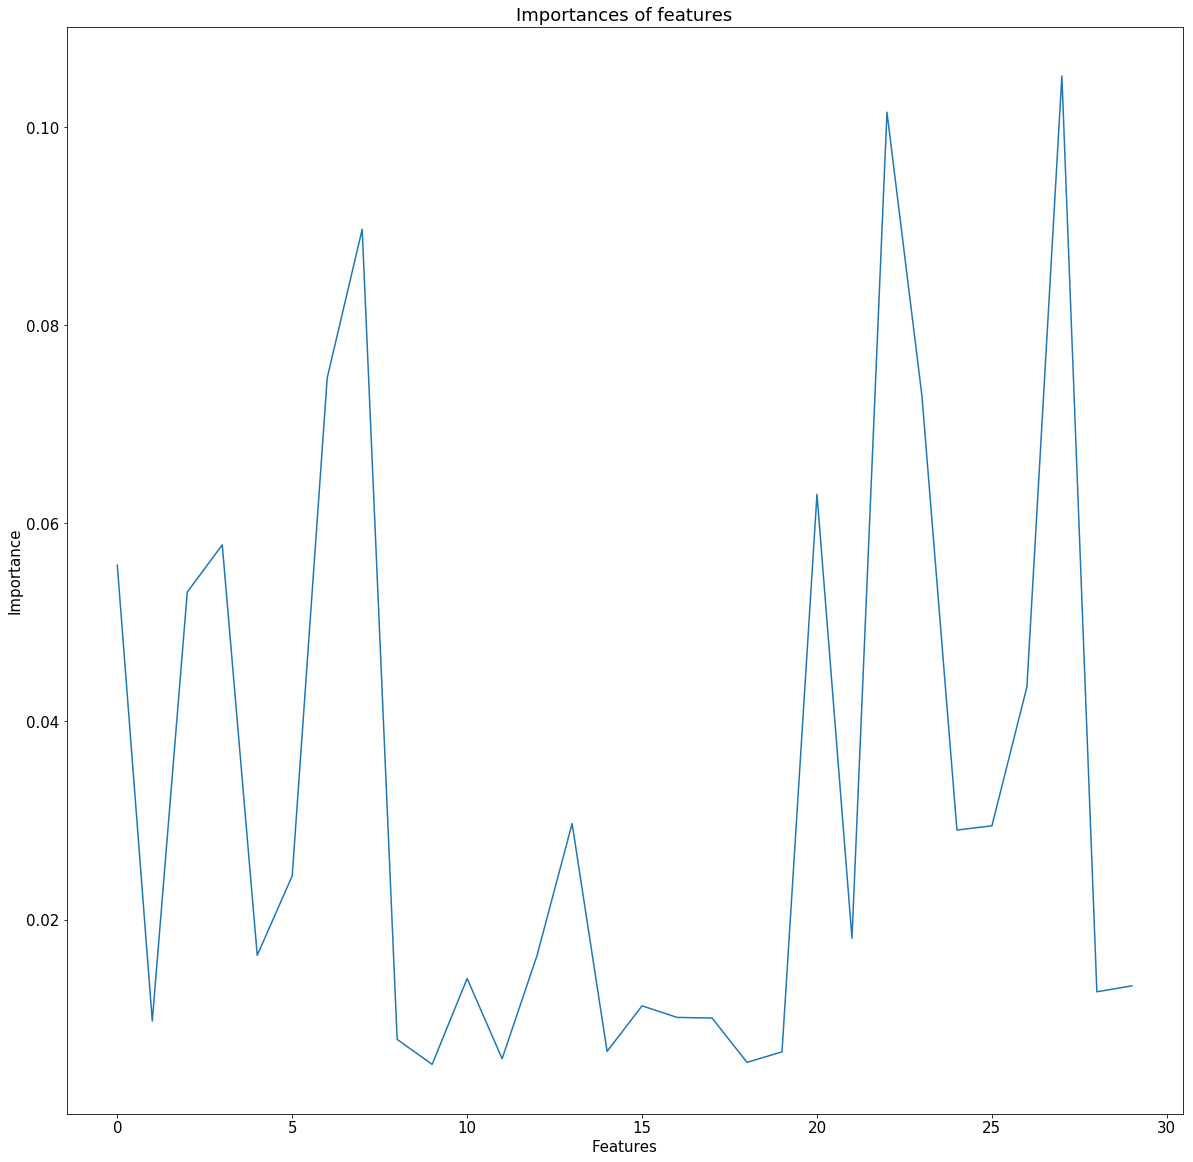

Features least important..
[ 9 18 11 19 14  8  1 17 16 15 28 29 10  4 12 21  5 24 25 13 26  2  0  3
 20 23  6  7 22 27]
to most important
Re-run it, you'll see it changes, but only a little. The big players are always the big players.


In [128]:
#Step 3. Prepare Data: (on training data only)
#Feature Selection (on training data)
from sklearn.ensemble import ExtraTreesClassifier

# fit an Extra Trees model to the data
model = ExtraTreesClassifier(n_estimators=100)
model.fit(X_train,Y_train)

plt.plot(model.feature_importances_)
plt.title("Importances of features")
plt.xlabel("Features")
plt.ylabel("Importance")
plt.show()

ind = np.argsort(model.feature_importances_,axis=0)
print("Features least important..")
print(ind)
print("to most important")
print("Re-run it, you'll see it changes, but only a little. The big players are always the big players.")



In [132]:
help(pca)

Help on PCA in module sklearn.decomposition.pca object:

class PCA(sklearn.decomposition.base._BasePCA)
 |  PCA(n_components=None, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)
 |  
 |  Principal component analysis (PCA)
 |  
 |  Linear dimensionality reduction using Singular Value Decomposition of the
 |  data to project it to a lower dimensional space.
 |  
 |  It uses the LAPACK implementation of the full SVD or a randomized truncated
 |  SVD by the method of Halko et al. 2009, depending on the shape of the input
 |  data and the number of components to extract.
 |  
 |  It can also use the scipy.sparse.linalg ARPACK implementation of the
 |  truncated SVD.
 |  
 |  Notice that this class does not support sparse input. See
 |  :class:`TruncatedSVD` for an alternative with sparse data.
 |  
 |  Read more in the :ref:`User Guide <PCA>`.
 |  
 |  Parameters
 |  ----------
 |  n_components : int, float, None or string
 |      Number of co

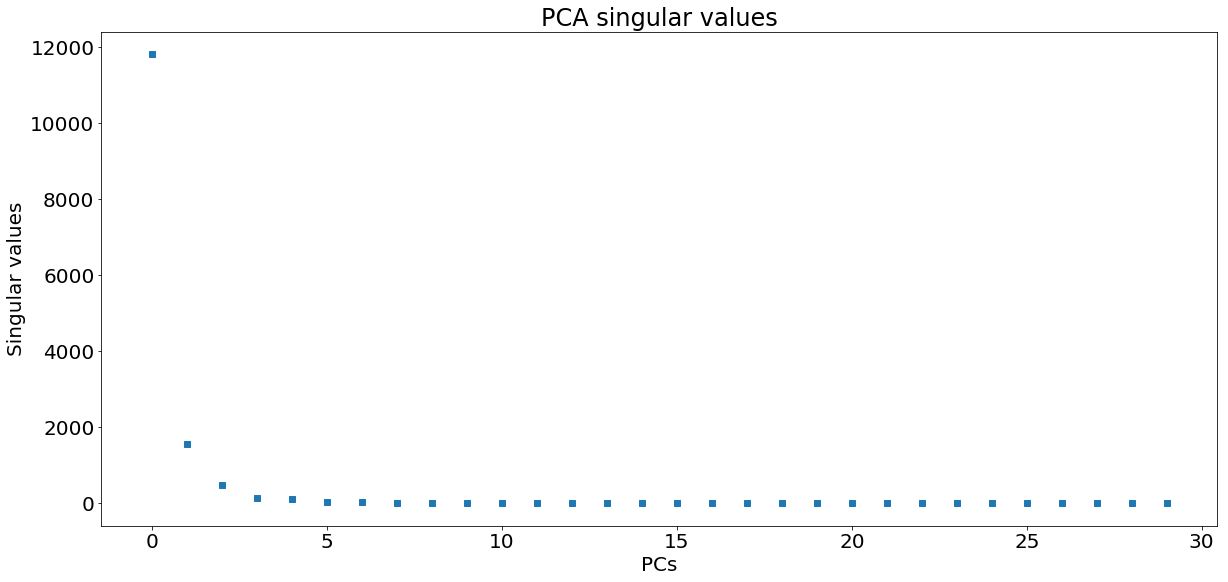

In [145]:
#Step 3. Prepare Data: (on training data only)
#Check PCA
import numpy as np

pca = PCA()
pca.fit(X_train)  
V = pca.transform(X_train)

plt.figure()
plt.subplot(211)
plt.plot(pca.singular_values_,'s') 
plt.title("PCA singular values")
plt.xlabel("PCs")
plt.rcParams.update({'font.size':20})
plt.ylabel("Singular values")
plt.show()
# print(pca.)

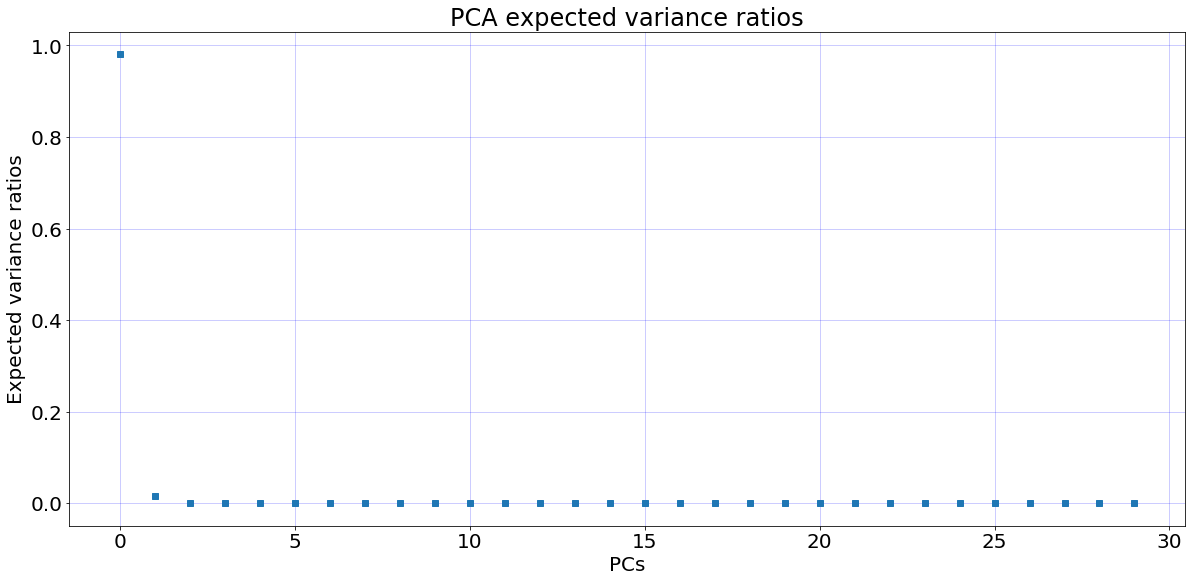

In [160]:
plt.figure()
plt.subplot(211)
plt.plot(pca.explained_variance_ratio_,'s') 
plt.grid(color='b', linestyle='-', linewidth=1, alpha=0.2)
plt.title("PCA expected variance ratios")
plt.xlabel("PCs")
plt.rcParams.update({'font.size':20})
plt.ylabel("Expected variance ratios")
plt.show()

______________________________________________________________________________________________________________
Select variables based on correlation with other variables: if pair is too highly correlated, delete one.

In [175]:
#Step 3. Prepare Data: (on training data only)
#Feature Selection (on training data)

ns = X_train.shape
n1 = ns[0]
n2 = ns[1]

Cor = np.corrcoef(np.transpose(X_train))
print("Initial number of variables: " +str(Cor.shape[1]))
columns = np.full((n2,), True, dtype=bool)
for i in range(n2):
    for j in range(i+1, n2):
        if Cor[i,j] >= 0.9:
           columns[j] = False

print("\nKeep? True/False:")
print(columns)
data = X_train[:,columns]
print("\nNumber selected: "+str(data.shape[1]))

Initial number of variables: 30

Keep? True/False:
[ True  True False False  True  True False False  True  True  True  True
 False False  True  True  True  True  True  True False False False False
  True  True  True False  True  True]

Number selected: 19


LR: 0.995120 (0.008131)
LDA: 0.994780 (0.005816)
KNN: 0.993644 (0.009487)
MLP: 0.996319 (0.007363)


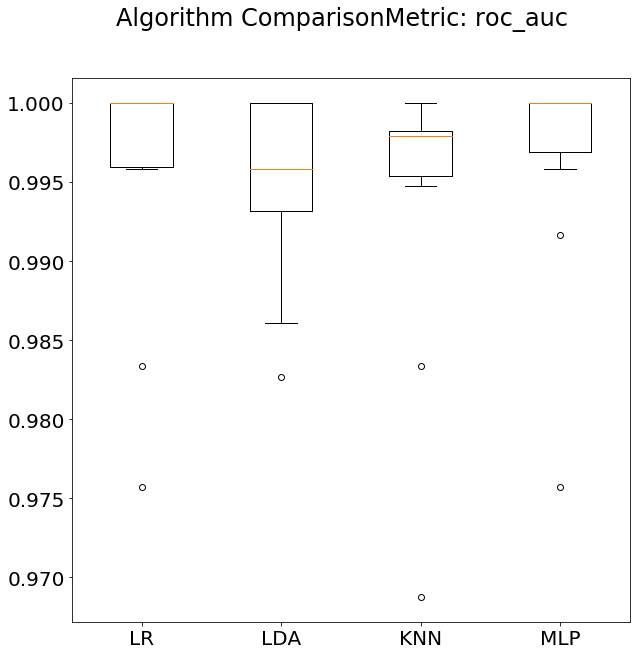

LR: 0.967731 (0.015856)
LDA: 0.955966 (0.027163)
KNN: 0.964706 (0.017647)
MLP: 0.976471 (0.025641)


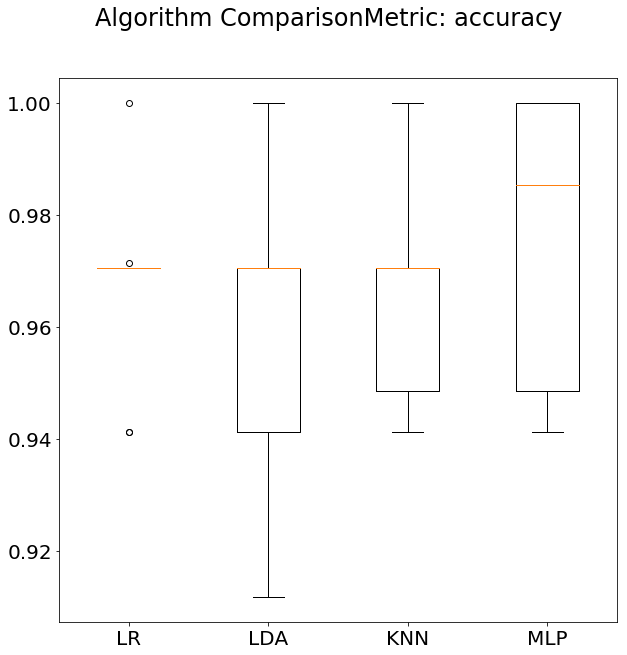

In [198]:
#Step 4. Evaluate Algorithms (on training data only)

seed = 7
flagPrep = True
Y_train = np.ravel(Y_train) # Due to a convention warning.

if flagPrep ==  True:
  #Data Reduction
  n=5
  index = ind[-20:] # take the last n (of the feature importance sorted into order)
  X_Red = X_train[:,index]  
  #X_Red = n_features
  #transform the data
  scaler = StandardScaler()
  scaler.fit(X_Red)
  X_train_Transformed = scaler.transform(X_Red)
else: 
  X_train_Transformed = X_train

# prepare models
models = []
models.append(('LR', LogisticRegression(solver = 'lbfgs',max_iter=2500,class_weight='balanced')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('MLP',MLPClassifier(hidden_layer_sizes = 15, alpha=1, max_iter=750)))

for i in range(2):
# evaluate each model in turn
    results = []
    names = []
    if i == 0:
      scoring = 'roc_auc'
    else:
      scoring = 'accuracy'
    
    for name, model in models:
        kfold = model_selection.KFold(n_splits=10, random_state=seed)
        cv_results = model_selection.cross_val_score(model,X_train_Transformed , Y_train, cv=kfold, scoring=scoring)
        results.append(cv_results)
        names.append(name)
        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)
    # boxplot algorithm comparison
    fig = plt.figure(figsize=(10,10))
    fig.suptitle('Algorithm Comparison' + str ('Metric: ') + str(scoring))
    ax = fig.add_subplot(111)
    plt.rcParams["figure.figsize"] = (10,10)
    plt.boxplot(results)
    ax.set_xticklabels(names)
    plt.show()

## Now take the winning model and improve it
using a Pipeline().

In [194]:
#Step 5. Improve Results  -  (on training data only)
#create a pipeline
estimators = [] 
estimators.append(('standardize', StandardScaler())) 
estimators.append(('pca', PCA()))
estimators.append(('logistic', LogisticRegression(class_weight = 'balanced',solver='lbfgs',max_iter=2000)))

param_grid = {
    'pca__n_components': [2,3,4,5,6,7,8,9,10],
    'logistic__C': [10,5,1,0.1,0.01,0.001]
}

model = Pipeline(estimators) # evaluate pipeline

In [195]:
#Step 5. Improve Results  -  (on training data only)
#HyperParameter Selection
search = GridSearchCV(model, param_grid, iid=False, cv=10,return_train_score=False,scoring='roc_auc')
search.fit(X_train,Y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.996):
{'logistic__C': 1, 'pca__n_components': 8}


In [225]:
#Step 5. Present Results: (on training data only)
#CV for best model on training data only
from sklearn.model_selection import cross_val_predict,StratifiedKFold
n_repeats = 10
best_pipeline = search.best_estimator_
threshold = 0.1

auc_cv = np.zeros(n_repeats)
sen_cv = np.zeros(n_repeats)
spe_cv = np.zeros(n_repeats)
npv_cv = np.zeros(n_repeats)

for i in range(n_repeats):
    y_pred_cv = np.zeros(Y_train.shape)
    y_proba_cv  = cross_val_predict(best_pipeline,X_train,Y_train,cv=StratifiedKFold(3, shuffle=True),method = "predict_proba")
    y_proba_cv = y_proba_cv[:,1]
    y_pred_cv[y_proba_cv > threshold] = 1.0
    fpr_cv, tpr_cv, thresholds_cv = roc_curve(Y_train, y_proba_cv)
    auc_cv[i] = roc_auc_score(Y_train, y_proba_cv)
    tn_cv,fp_cv,fn_cv,tp_cv = confusion_matrix(Y_train,y_pred_cv).ravel()
    sen_cv[i] = tp_cv / (tp_cv + fn_cv)
    spe_cv[i] = tn_cv / (tn_cv + fp_cv)
    npv_cv[i] = tn_cv / (tn_cv + fn_cv)
    
npv_std = npv_cv.std() / np.sqrt(n_repeats)
auc_std = auc_cv.std() / np.sqrt(n_repeats)
print("sensitivity %0.3f (+/- %0.01g)" % (sen_cv.mean(),1.96 * sen_cv.std() / np.sqrt(n_repeats)))
print("specificity %0.3f (+/- %0.01g)" % (spe_cv.mean(),1.96 * spe_cv.std() / np.sqrt(n_repeats)))
print("NPV %0.3f (+/- %0.01g)" % (npv_cv.mean(),1.96 * npv_std))
print("AUC %0.4f (+/- %0.01g)" % (auc_cv.mean(),1.96 * auc_std))
# using %0.01g rounds to 1 significant figure.
# using %0.3f rounds to 3 decimal places

sensitivity 0.991 (+/- 0.002)
specificity 0.863 (+/- 0.007)
NPV 0.994 (+/- 0.001)
AUC 0.9944 (+/- 0.0009)


## Present the results:

In [226]:
#Step 6. Present Results: (build using training data only and apply to validation data)
#prepare final model and apply to validation data
method = 1
if method == 1:
    #finalise the model
    preprocess_pipeline = make_pipeline(StandardScaler(), PCA(n_components=search.best_params_['pca__n_components']))
    #prepare the data (train and validation)
    preprocess_pipeline.fit(X_train)
    X_train_transformed = preprocess_pipeline.transform(X_train)
    X_validation_transformed = preprocess_pipeline.transform(X_validation)
    #fit to the whole data
    model = LogisticRegression(class_weight = 'balanced',solver='lbfgs',max_iter=1000,C = search.best_params_['logistic__C'] )
    model.fit(X_train_transformed,Y_train)
    predictions = model.predict(X_validation_transformed)
    probs = model.predict_proba(X_validation_transformed)
    probsx = probs[:,1]
    print('Best Model Parameters and fitting to the final data')
    print('intercept is',model.intercept_)
    print('coefficients are',model.coef_)
elif method == 2:
    #alternative way
    p_clf = make_pipeline(StandardScaler(), PCA(n_components=search.best_params_['pca__n_components']), 
                            LogisticRegression(class_weight = 'balanced',solver='lbfgs',max_iter=1000,C = search.best_params_['logistic__C'] ))
    p_clf.fit(X_train, Y_train) 
    predictions = p_clf.predict(X_validation)
    probs = p_clf.predict_proba(X_validation)
    probsx =probs[:,1]
else:
    p_clf = make_pipeline(best_pipeline)
    p_clf.fit(X_train, Y_train) 
    predictions = p_clf.predict(X_validation)
    probs = p_clf.predict_proba(X_validation)
    probsx = probs[:,1]
    
print(probsx[0:7])

Best Model Parameters and fitting to the final data
intercept is [0.30845377]
coefficients are [[ 2.42342902 -1.17485205 -0.39321808  0.17581396 -1.34314259 -0.49525419
   0.28999721  1.04825919]]
[3.57793237e-04 4.04127190e-03 1.71411373e-01 9.99876203e-01
 9.99990232e-01 1.04034767e-01 9.99999959e-01]


In [231]:
#Step 6. Present Results: (validation data)
# Sensitivity_and_specificity assuming a threshold on validation data
print("Validation set labels:")
print(Y_validation[0:9].T)
fpr, tpr, thresholds = roc_curve(Y_validation, probsx)
threshold = 0.1 # aka Cut-off
y_pred = np.zeros(probsx.shape)
y_pred[probsx > threshold] = 1
tn,fp,fn,tp = confusion_matrix(Y_validation,y_pred).ravel()
sen = tp / (tp+fn)
spec = tn / (tn+fp)
# calculate AUC
auc = roc_auc_score(Y_validation, probsx)
print("AUC %0.3f" %auc)
print("Cut-off {}". format(threshold))
print("sensitivity: %0.3f" %(sen))
print("specificity: %0.3f" %(spec))

Validation set labels:
[[0. 0. 0. 1. 1. 0. 1. 0. 0.]]
AUC 0.993
Cut-off 0.1
sensitivity: 0.976
specificity: 0.853


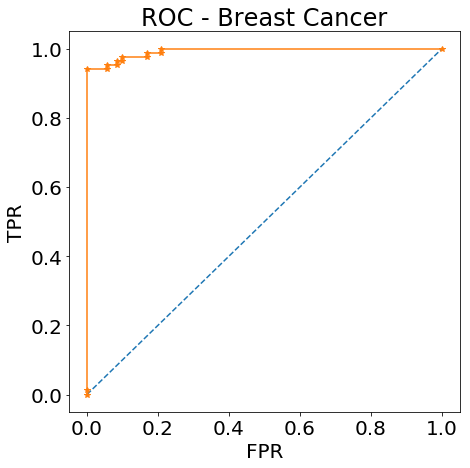

In [243]:
#Step 6. Present Results:  (validation data)
#plot ROC receiver operating characteristic.
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='*')
plt.rcParams["figure.figsize"] = (5,5)
# show the plot
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC - Breast Cancer')
plt.show()


In [248]:
#Step 6. Present Results:  (validation data)
#check the results
print('The accuracy score is')
accur = accuracy_score(Y_validation, predictions)
print(round(accur,3))
print('\nThe confusion matrix is')
print(confusion_matrix(Y_validation, predictions))
print('\nThe classification report is')
print(classification_report(Y_validation, predictions))

The accuracy score is
0.939

The confusion matrix is
[[133  10]
 [  4  81]]

The classification report is
              precision    recall  f1-score   support

         0.0       0.97      0.93      0.95       143
         1.0       0.89      0.95      0.92        85

   micro avg       0.94      0.94      0.94       228
   macro avg       0.93      0.94      0.94       228
weighted avg       0.94      0.94      0.94       228



In [246]:
help(classification_report)

Help on function classification_report in module sklearn.metrics.classification:

classification_report(y_true, y_pred, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False)
    Build a text report showing the main classification metrics
    
    Read more in the :ref:`User Guide <classification_report>`.
    
    Parameters
    ----------
    y_true : 1d array-like, or label indicator array / sparse matrix
        Ground truth (correct) target values.
    
    y_pred : 1d array-like, or label indicator array / sparse matrix
        Estimated targets as returned by a classifier.
    
    labels : array, shape = [n_labels]
        Optional list of label indices to include in the report.
    
    target_names : list of strings
        Optional display names matching the labels (same order).
    
    sample_weight : array-like of shape = [n_samples], optional
        Sample weights.
    
    digits : int
        Number of digits for formatting output floating po

## Thank you, enjoy.